Written by Colab

MSE : Mean Squared Error

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y - t)**2) 


In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
mean_squared_error(np.array(y), np.array(t))


0.09750000000000003

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
mean_squared_error(np.array(y), np.array(t))

0.5975

CEE: Cross Entropy Error

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

미니 배치 학습

In [18]:
import sys, os
sys.path.append(os.pardir)
from google.colab import files
uploaded = files.upload()
from mnist import load_mnist

ModuleNotFoundError: ignored

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

(60000, 784)
(60000, 10)


교차 엔트로피 오차 구현하기(정답 레이블 = 원-핫 인코딩)

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size
  

교차 엔트로피 오차 구현하기(정답 레이블 = 숫자 레이블)

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7))

수치 미분 함수(Worst)

In [ ]:
def numerical_diff(f, x):
  h = 10e-50
  return (f(x + h) -f(x)) / h

수치 미분 함수(improved)

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x + h) -f(x - h)) / (2*h)

수치 미분의 예

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

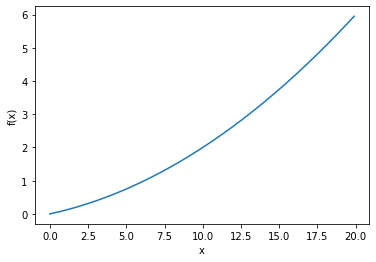

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
numerical_diff(function_1, 10)

0.2999999999986347

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

편미분

In [ ]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
def function_tmp2(x1):
  return 3.0**2 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

Gradient

In [6]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    
    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [ ]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [ ]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

경사법

In [10]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

In [12]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [13]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [14]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [15]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

신경망에서의 기울기

In [21]:
from google.colab import files
uploaded = files.upload()

Saving gradient.py to gradient.py


In [20]:
from google.colab import files
uploaded = files.upload()

Saving functions.py to functions.py


In [23]:
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)

  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

In [26]:
net = simpleNet()
print(net.W)

[[-0.25321859 -2.22134422  0.96543651]
 [ 1.12587481 -1.74447792  0.69420341]]


In [27]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)



[ 0.86135617 -2.90283666  1.20404497]


In [28]:
np.argmax(p)


2

In [29]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.545990704310988

In [30]:
def f(W):
  return net.loss(x, t)

In [31]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.24671894  0.0057205  -0.25243945]
 [ 0.37007841  0.00858076 -0.37865917]]


학습 알고리즘 구현하기

In [46]:
from functions import *
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
  
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuaracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [39]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)

In [40]:
net.params['W1'].shape

(784, 100)

In [41]:
net.params['b1'].shape

(100,)

In [42]:
net.params['W2'].shape

(100, 10)

In [43]:
net.params['b2'].shape

(10,)

In [47]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

ValueError: ignored

In [45]:
grad['W1'].shape

NameError: ignored

In [ ]:
grad['b1'].shape

In [ ]:
grad['W2'].shape

In [ ]:
grad['b2'].shape